In [3]:
import pandas as pd
import urllib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#相関関数のため読み込む
import scipy as sp
#線形単回帰
from sklearn import linear_model

In [4]:
data = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pd.read_csv(data)

In [5]:
#アルコール,リンゴ酸,灰,灰分のアルカリ度,マグネシウム,総フェノール,フラバノイド
#非フラバノイドフェノール,プロアントシアニン,色の濃さ,色相,希釈ワインのOD 280 / OD 315,プロリン
columns_name = ['class','Alcohol','Malic_acid','Ash',
                'Alcalinity_of_ash','Magnesium','Total_phenols',
                'Flavanoids','Nonflavanoid_phenols','Proanthocyanins',
                'Color_intensity','Hue','OD280_OD315','Proline']
wine.columns = columns_name

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
class,1.000000,-0.321238,0.436127,-0.048260,0.513963,-0.198944,-0.717933,-0.846485,0.487215,-0.494887,0.268562,-0.617690,-0.786428,-0.631227
Alcohol,-0.321238,1.000000,0.099963,0.210964,-0.303350,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
Malic_acid,0.436127,0.099963,1.000000,0.164955,0.286148,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
Ash,-0.048260,0.210964,0.164955,1.000000,0.446698,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
Alcalinity_of_ash,0.513963,-0.303350,0.286148,0.446698,1.000000,-0.071707,-0.317583,-0.346922,0.359395,-0.190779,0.020478,-0.272719,-0.268186,-0.436858
Magnesium,-0.198944,0.258742,-0.049049,0.287107,-0.071707,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
Total_phenols,-0.717933,0.284543,-0.333512,0.128176,-0.317583,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
Flavanoids,-0.846485,0.230133,-0.409324,0.114084,-0.346922,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
Nonflavanoid_phenols,0.487215,-0.151445,0.291501,0.187354,0.359395,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
Proanthocyanins,-0.494887,0.127561,-0.217975,0.008082,-0.190779,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731


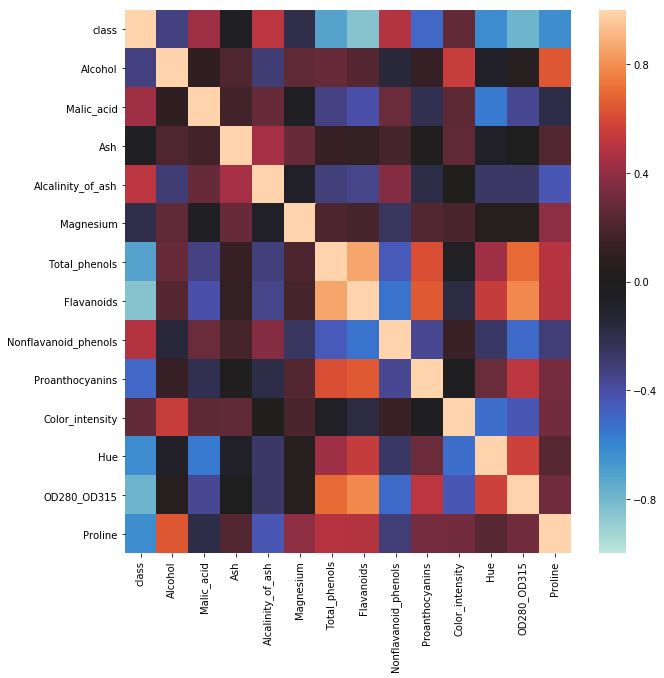

In [29]:
REG = linear_model.LinearRegression()
display(wine.corr())
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(), vmax=1, vmin=-1, center=0)


In [24]:
#相関係数の並び替え
wine_corr = wine.corr().abs().unstack()
#display(wine_corr)
wine_corr_sort = wine_corr.sort_values(ascending=False)
#display(wine_corr_sort)
#display(type(wine_corr_sort)) 
wine_corr_list = pd.DataFrame(wine_corr_sort)
display(wine_corr_list)

,,0
Proline,Proline,1.000000
OD280_OD315,OD280_OD315,1.000000
Alcohol,Alcohol,1.000000
Malic_acid,Malic_acid,1.000000
Ash,Ash,1.000000
Alcalinity_of_ash,Alcalinity_of_ash,1.000000
Magnesium,Magnesium,1.000000
Total_phenols,Total_phenols,1.000000
Flavanoids,Flavanoids,1.000000
Nonflavanoid_phenols,Nonflavanoid_phenols,1.000000


In [25]:
#相関係数上位を表示、１３成分の同一ペアの相関係数が1.0になることに注意
ra_low, ra_hi = 14, 25
display(wine_corr_list.iloc[ra_low:ra_hi])

0
Total_phenols Flavanoids     0.864046
Flavanoids    Total_phenols  0.864046
              class          0.846485
class         Flavanoids     0.846485
OD280_OD315   class          0.786428
class         OD280_OD315    0.786428
Flavanoids    OD280_OD315    0.786372
OD280_OD315   Flavanoids     0.786372
Total_phenols class          0.717933
class         Total_phenols  0.717933
Total_phenols OD280_OD315    0.699566